In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.shape

(1460, 3)

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [6]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [7]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

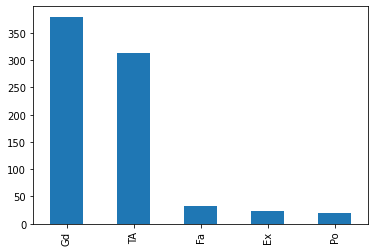

In [8]:
df.FireplaceQu.value_counts().plot(kind='bar')

In [9]:
df['GarageQual'].mode()

0    TA
dtype: object

In [10]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

Text(0.5, 1.0, 'GarageQual')

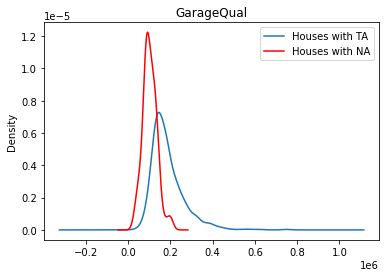

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

Text(0, 0.5, 'Number of houses')

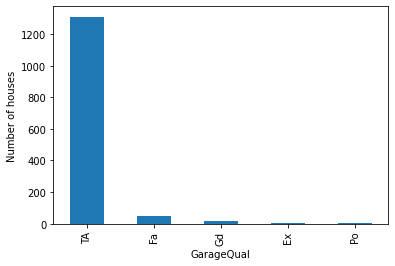

In [12]:
df.GarageQual.value_counts().plot(kind='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [13]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [15]:
X_train.head()

,FireplaceQu,GarageQual
434,NaN,NaN
319,TA,TA
662,TA,TA
986,NaN,Fa
1339,NaN,TA


In [16]:
X_test.head()

,FireplaceQu,GarageQual
529,TA,TA
491,TA,TA
459,TA,TA
279,TA,TA
655,NaN,TA


In [17]:
X_train.shape

(1241, 2)

In [18]:
X_test.shape

(219, 2)

In [19]:
imp = SimpleImputer(strategy='most_frequent')
imp1 = SimpleImputer(strategy='constant',fill_value='Missing')

In [20]:
trf = ColumnTransformer(transformers=[
    ('imp',imp,[1]),
    ('imp1',imp1,[0])
])# passthrough nahi kar rahe kyuki baki kuch bacha hi nahi he data me ye 2 column ke alava

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [22]:
X_train_transformed.shape

(1241, 2)

In [23]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=['FireplaceQu','GarageQual'])

In [24]:
X_train_transformed

,FireplaceQu,GarageQual
0,TA,Missing
1,TA,TA
2,TA,TA
3,Fa,Missing
4,TA,Missing
...,...,...
1236,TA,Gd
1237,TA,Missing
1238,TA,Missing
1239,TA,TA


In [26]:
temp = df[df['GarageQual']=='TA']['SalePrice']

Text(0.5, 1.0, 'GarageQual')

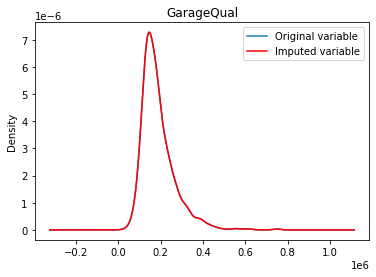

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

Text(0.5, 1.0, 'FireplaceQu')

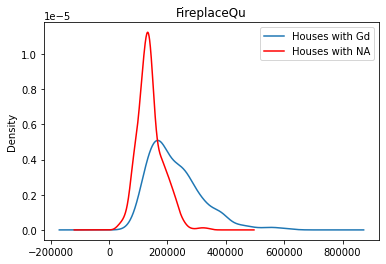

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [29]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

Text(0.5, 1.0, 'FireplaceQu')

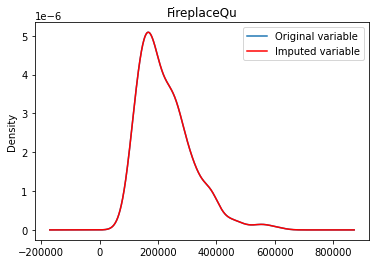

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')